# 1. Problem Framing

Business application is that the company identified a lot of wastage in the business. To reduce this we are determining when extra staff are needed and when they are not needed.

# 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('H2.csv')

In [3]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## 2.1. Calculating Cost Function

In [85]:
import sklearn

In [86]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [4]:
len(df)

79330

In [5]:
df.IsCanceled.value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

In [6]:
df_null = df[df['Company'] == '       NULL']

# 3. Preprocessing

In [7]:
# df.hist(bins=30, figsize=(16,16))
# plt.show()

In [8]:
len(df)

79330

In [9]:
df.isna().sum().sum()

28

In [10]:
df = df.dropna()

In [11]:
df.isna().sum().sum()

0

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
len(df)

79302

In [14]:
# df.loc[df['Agent'] == '       NULL']

In [15]:
df.drop(columns=['ReservationStatusDate', 'Company', 'ReservationStatus'], inplace=True)

In [16]:
len(df)

79302

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
y = df[['IsCanceled']]
X = df.drop(columns=['IsCanceled','ArrivalDateYear'])

In [19]:
num_features = ['LeadTime',
            'StaysInWeekendNights',
            'StaysInWeekNights',
            'Adults',
            'Children',
            'Babies',
            'PreviousCancellations',
            'PreviousBookingsNotCanceled',
            'BookingChanges',
            'DaysInWaitingList',
            'ADR',
            'RequiredCarParkingSpaces',
            'TotalOfSpecialRequests']

df_num = X[num_features]

df_cat = X.drop(columns=num_features)

cat_features = list(df_cat.columns)

In [20]:
len(X)

79302

In [21]:
len(y)

79302

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

In [23]:
le = LabelEncoder()
X[cat_features] = X[cat_features].apply(
                            lambda col: le.fit_transform(col))

In [24]:
len(X)

79302

In [25]:
X[cat_features].head()

,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,DepositType,Agent,CustomerType
0,5,26,0,2,125,5,3,0,0,0,0,5,2
1,5,26,0,0,125,6,3,0,0,0,0,8,2
2,5,26,0,0,125,6,3,0,0,0,0,8,2
3,5,26,0,0,125,6,3,0,0,0,0,8,2
4,5,26,1,0,125,6,3,0,0,0,0,8,2


In [26]:
ohe = OneHotEncoder(categories='auto', drop='first')
X_ohe = ohe.fit_transform(X[cat_features])

In [27]:
feature_names = list(ohe.get_feature_names(cat_features))

In [28]:
X_ohe = pd.DataFrame.sparse.from_spmatrix(X_ohe)

In [29]:
X_ohe

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X_ohe.columns = feature_names

In [31]:
X_ohe.isnull().sum().sum()

0

In [32]:
len(X)

79302

In [33]:
len(X_ohe)

79302

In [34]:
X_merged = pd.concat([X, X_ohe], axis=1)

In [35]:
len(X_merged)

79302

In [36]:
X_merged.tail()

,LeadTime,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,...,Agent_217,Agent_218,Agent_219,Agent_220,Agent_221,Agent_222,Agent_223,CustomerType_1,CustomerType_2,CustomerType_3
79297,23,1,34,29,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79298,102,1,34,30,2,5,3,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79299,34,1,34,30,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79300,109,1,34,30,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79301,205,1,34,28,2,7,2,0.0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 4. Modelling

## 4.1. Modelling Functions

In [37]:
from sklearn.metrics import roc_auc_score
def scores(model,X_train,X_val,y_train,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'test:',round(val,2))

In [38]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [39]:
from sklearn.metrics import roc_curve
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [40]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

## 4.2. Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_merged, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=50)

In [53]:
y_train.isnull().sum().sum()

0

## 4.3. Model Creation

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=50)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_reg = LogisticRegression()

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
dtree_clf.score(X_train, y_train)

0.9954099132423162

In [62]:
param_grid = {'max_depth':range(10,50+1,10),'min_samples_leaf':[5,50,500]}
grid_clf = GridSearchCV(dtree_clf, param_grid, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [66]:
best_model = opt_model.best_estimator_
scores(best_model,X_train, X_val, y_train, y_val)

train: 0.93 test: 0.93


In [71]:
pd.DataFrame(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.606483,0.560714,0.0,0.0,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.178411,0.350224,0.0,0.0,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.169322,0.261815,0.0,0.0,10,500,"{'max_depth': 10, 'min_samples_leaf': 500}",NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.097387,0.073837,0.0,0.0,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.372893,0.052873,0.0,0.0,20,50,"{'max_depth': 20, 'min_samples_leaf': 50}",NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.486349,0.047038,0.0,0.0,20,500,"{'max_depth': 20, 'min_samples_leaf': 500}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.679736,0.053536,0.0,0.0,30,5,"{'max_depth': 30, 'min_samples_leaf': 5}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.849500,0.103801,0.0,0.0,30,50,"{'max_depth': 30, 'min_samples_leaf': 50}",NaN,NaN,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.894510,0.085426,0.0,0.0,30,500,"{'max_depth': 30, 'min_samples_leaf': 500}",NaN,NaN,NaN,...,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.855856,0.037522,0.0,0.0,40,5,"{'max_depth': 40, 'min_samples_leaf': 5}",NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: zero-size array to reduction operation minimum which has no identity

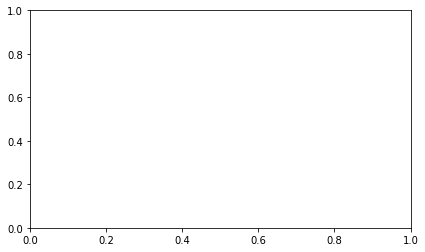

In [68]:
opt_plots(grid_clf)

In [80]:
from sklearn.model_selection import RandomizedSearchCV

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   43.8s finished


train: 0.93 test: 0.93
{'min_samples_leaf': 5, 'max_depth': 10}


ValueError: zero-size array to reduction operation minimum which has no identity

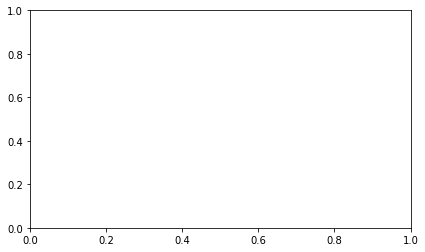

In [83]:
%%time
param_distributions = {'max_depth':range(10,50+1,10),'min_samples_leaf':[5,50,500]}

opt_model = RandomizedSearchCV(dtree_clf, param_distributions, n_iter=50, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1, verbose=True)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train, X_val, y_train, y_val)
print(opt_model.best_params_)
opt_plots(opt_model)